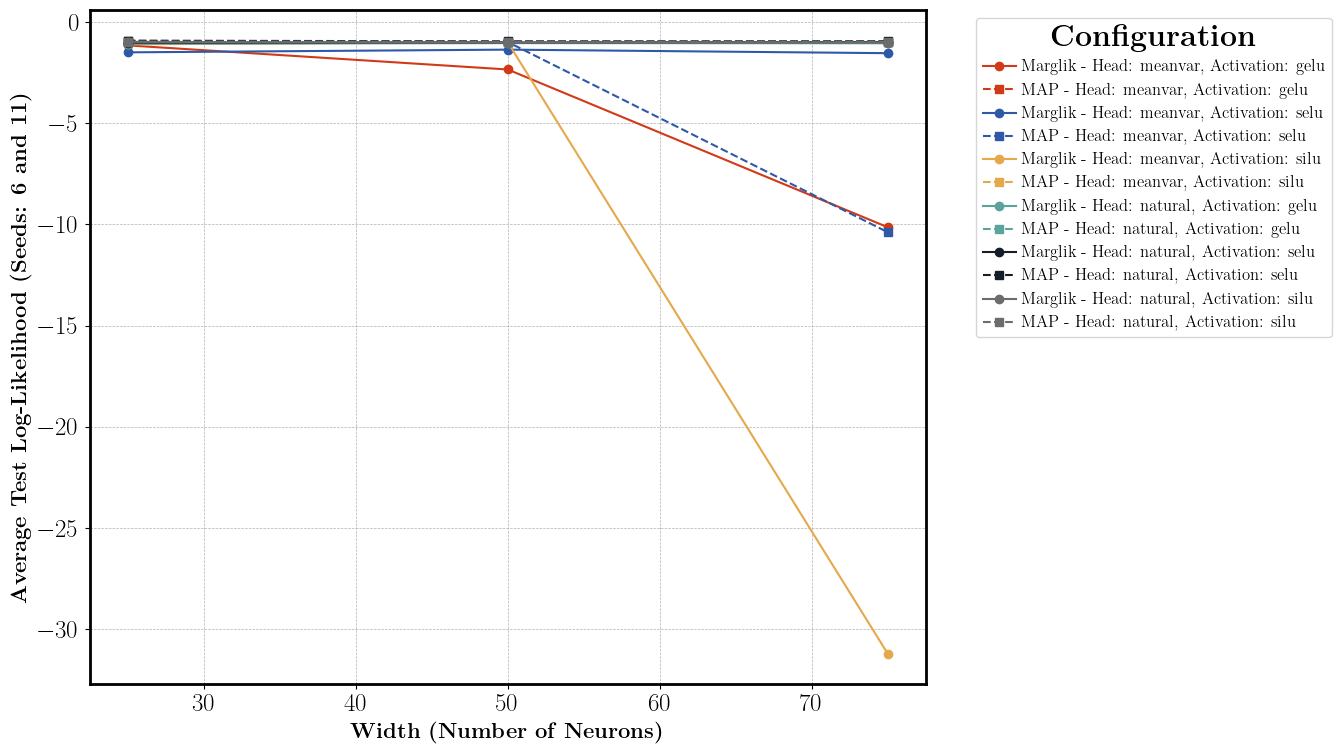

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 设置字体和样式
plt.rc("font", family="serif")
plt.rc("text", usetex=True)
plt.rc("font", size=22)
plt.rc("axes", labelsize=16, linewidth=2)
plt.rc("legend", fontsize=12, handletextpad=0.3)
plt.rc("xtick", labelsize=18)
plt.rc("ytick", labelsize=18)

# 定义颜色
color_palette = [
    "#D23918", "#2E59A7", "#E5A84B", "#5DA39D", "#151D29", "#6B6C6E",
    "#16A951", "#057748", "#3EEDE7", "#FF0097", "#9D2933", "#003371",
    "#9F6027", "#A76283", "#EA5514"
]

# 读取数据
file_path = "dp1_arch_all.csv"  # 替换为实际路径
data = pd.read_csv(file_path)

# 确保 `test/loglik` 是数值类型
data['test/loglik'] = pd.to_numeric(data['test/loglik'], errors='coerce')

# 按照 `head`、`activation`、`width` 和 `method` 分组，并计算 `test/loglik` 的均值
grouped_data = (
    data.groupby(['head', 'activation', 'width', 'method'])
    .agg({'test/loglik': 'mean'})
    .reset_index()
)

# 获取所有 `head` 和 `activation` 的组合
unique_combinations = grouped_data[['head', 'activation']].drop_duplicates()

# 创建图表
plt.figure(figsize=(14, 8))

# 绘制每组数据
for idx, combination in enumerate(unique_combinations.iterrows()):
    _, combination = combination
    subset_marglik = grouped_data[
        (grouped_data['head'] == combination['head']) &
        (grouped_data['activation'] == combination['activation']) &
        (grouped_data['method'] == 'marglik')
    ]
    subset_map = grouped_data[
        (grouped_data['head'] == combination['head']) &
        (grouped_data['activation'] == combination['activation']) &
        (grouped_data['method'] == 'map')
    ]
    
    # 绘制 marglik 曲线
    if not subset_marglik.empty:
        plt.plot(
            subset_marglik['width'],
            subset_marglik['test/loglik'],
            label=f"Marglik - Head: {combination['head']}, Activation: {combination['activation']}",
            marker='o',
            linestyle='-',  # 实线
            color=color_palette[idx % len(color_palette)]
        )
    
    # 绘制 map 曲线
    if not subset_map.empty:
        plt.plot(
            subset_map['width'],
            subset_map['test/loglik'],
            label=f"MAP - Head: {combination['head']}, Activation: {combination['activation']}",
            marker='s',
            linestyle='--',  # 虚线
            color=color_palette[idx % len(color_palette)]
        )

# 美化图表
plt.xlabel(r'\textbf{Width (Number of Neurons)}')
plt.ylabel(r'\textbf{Average Test Log-Likelihood (Seeds: 6 and 11)}')
#plt.title(r'\textbf{Comparison of Marglik and MAP (Averaged over Seeds)}')
plt.legend(title=r'\textbf{Configuration}', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# 显示图表
plt.show()


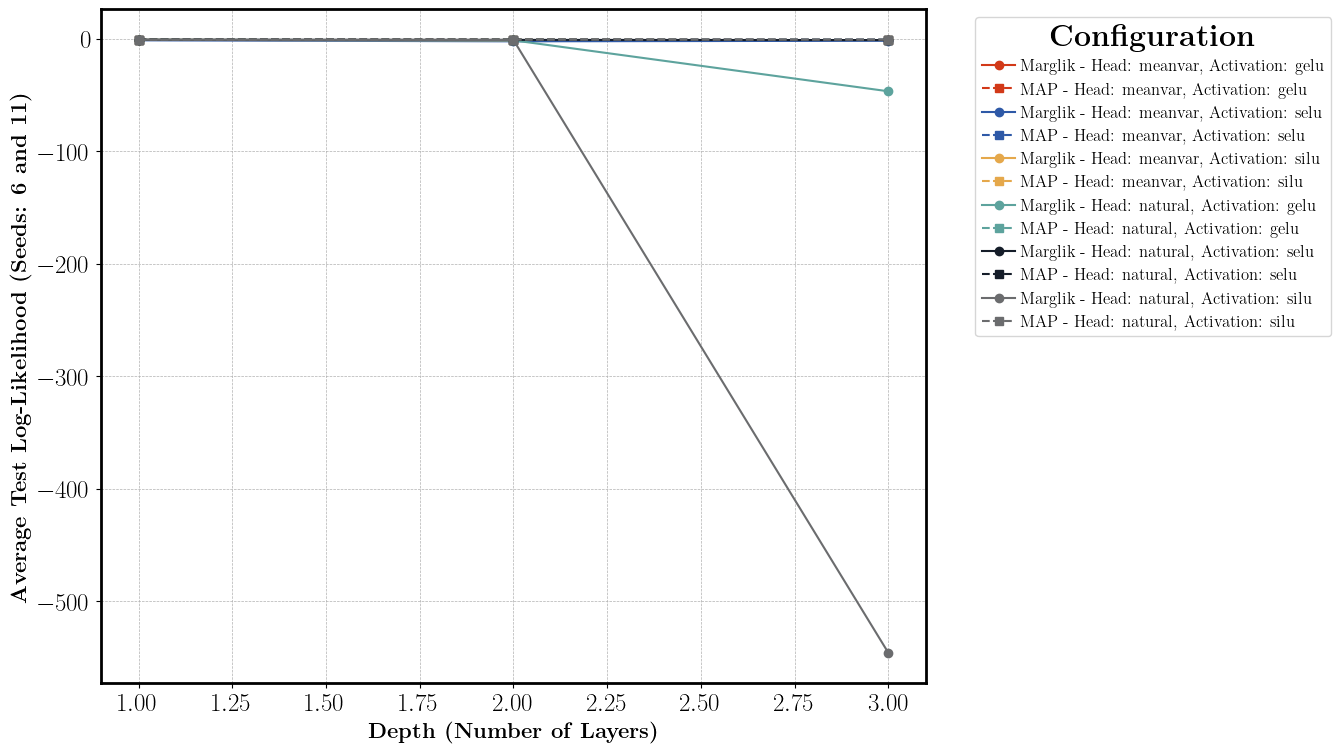

In [13]:
# 设置字体和样式
plt.rc("font", family="serif")
plt.rc("text", usetex=True)
plt.rc("font", size=22)
plt.rc("axes", labelsize=16, linewidth=2)
plt.rc("legend", fontsize=12, handletextpad=0.3)
plt.rc("xtick", labelsize=18)
plt.rc("ytick", labelsize=18)

# 定义颜色
color_palette = [
    "#D23918", "#2E59A7", "#E5A84B", "#5DA39D", "#151D29", "#6B6C6E",
    "#16A951", "#057748", "#3EEDE7", "#FF0097", "#9D2933", "#003371",
    "#9F6027", "#A76283", "#EA5514"
]

# 读取数据
file_path = "width25_arch_all.csv"  # 替换为实际路径
data = pd.read_csv(file_path)

# 确保 `test/loglik` 是数值类型
data['test/loglik'] = pd.to_numeric(data['test/loglik'], errors='coerce')
data = data[data['test/loglik'] >= -5000]

# 按照 `head`、`activation`、`depth` 和 `method` 分组，并计算 `test/loglik` 的均值
grouped_data = (
    data.groupby(['head', 'activation', 'depth', 'method'])
    .agg({'test/loglik': 'mean'})
    .reset_index()
)

# 获取所有 `head` 和 `activation` 的组合
unique_combinations = grouped_data[['head', 'activation']].drop_duplicates()

# 创建图表
plt.figure(figsize=(14, 8))

# 绘制每组数据
for idx, combination in enumerate(unique_combinations.iterrows()):
    _, combination = combination
    subset_marglik = grouped_data[
        (grouped_data['head'] == combination['head']) &
        (grouped_data['activation'] == combination['activation']) &
        (grouped_data['method'] == 'marglik')
    ]
    subset_map = grouped_data[
        (grouped_data['head'] == combination['head']) &
        (grouped_data['activation'] == combination['activation']) &
        (grouped_data['method'] == 'map')
    ]
    
    # 绘制 marglik 曲线
    if not subset_marglik.empty:
        plt.plot(
            subset_marglik['depth'],
            subset_marglik['test/loglik'],
            label=f"Marglik - Head: {combination['head']}, Activation: {combination['activation']}",
            marker='o',
            linestyle='-',  # 实线
            color=color_palette[idx % len(color_palette)]
        )
    
    # 绘制 map 曲线
    if not subset_map.empty:
        plt.plot(
            subset_map['depth'],
            subset_map['test/loglik'],
            label=f"MAP - Head: {combination['head']}, Activation: {combination['activation']}",
            marker='s',
            linestyle='--',  # 虚线
            color=color_palette[idx % len(color_palette)]
        )

# 美化图表
plt.xlabel(r'\textbf{Depth (Number of Layers)}')
plt.ylabel(r'\textbf{Average Test Log-Likelihood (Seeds: 6 and 11)}')
#plt.title(r'\textbf{Comparison of Marglik and MAP on Test Log-Likelihood vs Depth}')
plt.legend(title=r'\textbf{Configuration}', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# 显示图表
plt.show()
